# Heart Failure Prediction Model

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Dataset

In [30]:
data = pd.read_csv("heart.csv", encoding="latin-1")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Preprocessing

In [31]:
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})
data['ChestPainType'] = data['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})
data['ST_Slope'] = data['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

X = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = data['HeartDisease']

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


# Split the Data into Training and Testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model

In [33]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predicting the Data

In [34]:
y_pred = forest.predict(X_test)

# Conduct Accuracy and Report

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 88.59
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



# Evaluating the Model

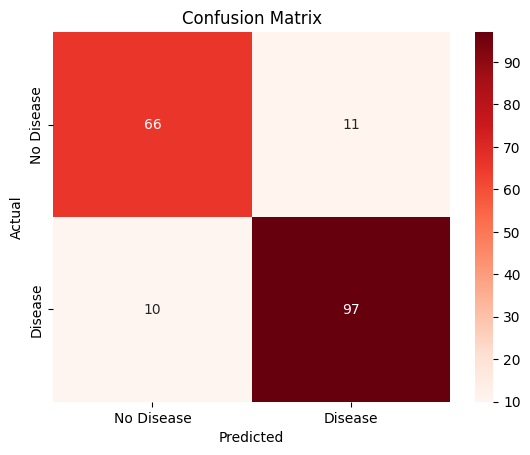

In [36]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Prediction

In [37]:
columns = ['Age','Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
           'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

#            Sex (F = 1, M = 0)
#  ChestPainType (ATA = 0, NAP = 1, ASY = 2, TA = 3)
#     RestingECG (Normal = 0, ST = 1, LVH = 2)
# ExerciseAngina (N = 0, Y = 1)
#       ST_Slope (Up = 0, Flat = 1, Down = 2)
    
test_data = pd.DataFrame([[49,1,1,160,180,0,0,156,0,1,1]], columns=columns)

prediction = forest.predict(test_data)

if prediction == 1:
    print("Prediction: Heart Disease")
else:
    print("Prediction: No Heart Disease")

Prediction: Heart Disease
